## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
total_mice = len(combined_data_df['Mouse ID'].unique())
total_mice

249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
remove_duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
remove_duplicate_mice

array(['g989'], dtype=object)

In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df['Mouse ID'] =='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin(['g989'])==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].count()

1880

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = combined_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = combined_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_dev = combined_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_error_means = combined_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
single_summary_table = pd.DataFrame({
    "Mean of Tumor Vol": mean, 
    "Med of Tumor Vol": median,
    "Var of Tumor Vol": variance,
    "SD of Tumor Vol": standard_dev,
    "SEM of Tumor Vol": standard_error_means
}) 

single_summary_table.round()

,Mean of Tumor Vol,Med of Tumor Vol,Var of Tumor Vol,SD of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,41.0,42.0,25.0,5.0,0.0
Ceftamin,53.0,52.0,39.0,6.0,0.0
Infubinol,53.0,52.0,43.0,7.0,0.0
Ketapril,55.0,54.0,69.0,8.0,1.0
Naftisol,54.0,53.0,66.0,8.0,1.0
Placebo,54.0,52.0,61.0,8.0,1.0
Propriva,52.0,51.0,42.0,7.0,1.0
Ramicane,40.0,41.0,23.0,5.0,0.0
Stelasyn,54.0,52.0,59.0,8.0,1.0


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

alt_single_summary_table = mean = combined_data_df.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem", "min", "max"]})

alt_single_summary_table

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                                    
                    min        max  
Drug Regimen                        
Capomulin     23.343598  48.158209  
Ceftamin      45.000000  68.923185  
Infubinol     36.321346  72.226731  
Ketapril      45.000000  78.567014  
Naftisol      45.000000  76.668817  
Placebo       45.000000  73.212939  
Propriva      45.000000  72.455421  
Ramicane      22.050126  47.622816  
Stelasyn      45.000000  75.123690  
Zoniferol     45.000000  73.324432

## Bar and Pie Charts

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Determine data points
drug_regimen_data = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

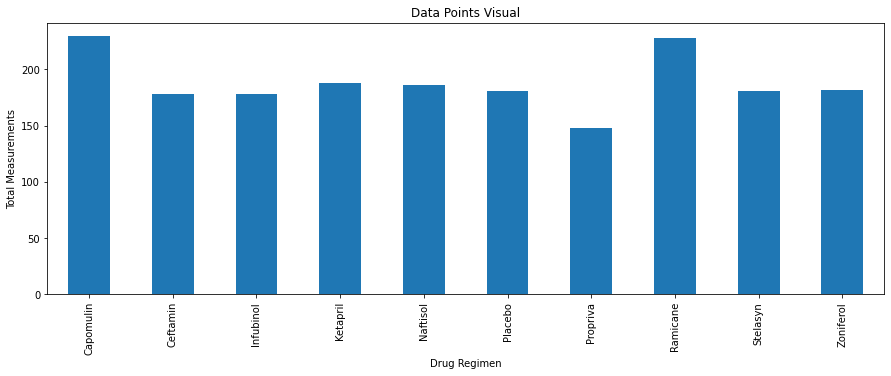

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_data.plot(kind="bar", figsize=(15,5))
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

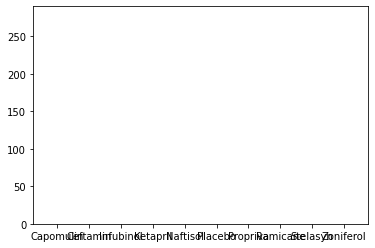

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Create the datta point arrays
measurement_array = [280, 230, 228, 188, 186, 182, 181, 178, 148]
x_axis = np.arange(len(drug_regimen_data))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
                            'Ramicane', 'Stelasyn', 'Zoniferol'])

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(measurement_array)+10)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
